# 資料預處理

In [1]:
from keras.utils import np_utils # One-hot-encoding
import numpy as np
np.random.seed(10) # 設定seed，可以讓每次隨機產生的資料，有相同輸出

In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
x_Train =x_train_image.reshape(60000, 784).astype('float32') #2維圖片轉一維；資料類型轉 float
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label) # 對 y 做 One-hot-encoding
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
# 建立線性堆疊模型，後續只要用model.add方法，加入Dense神經網路層( Dense層 是 Fully Connected的神經網路層)
model = Sequential()

In [8]:
model.add(Dense(units=256, # 此隱藏層神經元 256個
                input_dim=784,  # input = 784維 (前面 28*28 轉好的)
                kernel_initializer='normal',  # 用 normal distribution 亂數 得到初始的 weight & bias
                activation='relu')) 

In [9]:
model.add(Dense(units=10, # 最後一個隱藏層是輸出層，神經元10個對應數字 1~10，不須設定 input_dim= ，它會自動抓到上層的256個神經元
                kernel_initializer='normal', 
                activation='softmax'))

In [10]:
print(model.summary())
#200960 = 784*256 + 256
# 2570 = 256*10 + 10
# 203530 = 200960+2570

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy']) # 最優化方法用 Adam、評估模型用 'accuracy'

In [12]:
train_history =model.fit(x=x_Train_normalize, y=y_Train_OneHot,
                         validation_split=0.2,  # 從 train 切出 20% 做validation，留下80% 做train
                         epochs=10, batch_size=200 # 一次訓練 200筆資料
                         ,verbose=2) # 顯示訓練過程

Epoch 1/10
240/240 - 2s - loss: 0.4374 - accuracy: 0.8823 - val_loss: 0.2248 - val_accuracy: 0.9382
Epoch 2/10
240/240 - 0s - loss: 0.1936 - accuracy: 0.9453 - val_loss: 0.1631 - val_accuracy: 0.9534
Epoch 3/10
240/240 - 0s - loss: 0.1392 - accuracy: 0.9603 - val_loss: 0.1322 - val_accuracy: 0.9632
Epoch 4/10
240/240 - 0s - loss: 0.1065 - accuracy: 0.9698 - val_loss: 0.1132 - val_accuracy: 0.9675
Epoch 5/10
240/240 - 0s - loss: 0.0849 - accuracy: 0.9765 - val_loss: 0.1062 - val_accuracy: 0.9694
Epoch 6/10
240/240 - 0s - loss: 0.0694 - accuracy: 0.9807 - val_loss: 0.0926 - val_accuracy: 0.9727
Epoch 7/10
240/240 - 0s - loss: 0.0568 - accuracy: 0.9842 - val_loss: 0.0908 - val_accuracy: 0.9722
Epoch 8/10
240/240 - 0s - loss: 0.0475 - accuracy: 0.9872 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 9/10
240/240 - 0s - loss: 0.0402 - accuracy: 0.9892 - val_loss: 0.0834 - val_accuracy: 0.9762
Epoch 10/10
240/240 - 0s - loss: 0.0331 - accuracy: 0.9912 - val_loss: 0.0786 - val_accuracy: 0.9761

# 以圖形顯示訓練過程

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

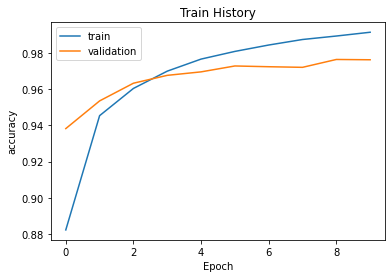

In [14]:
show_train_history(train_history,'accuracy','val_accuracy')

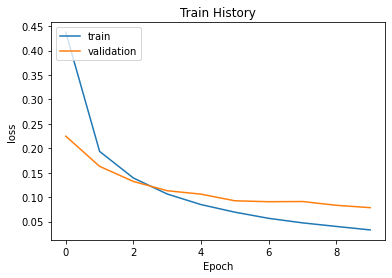

In [15]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [18]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)

print()
print('accuracy=',scores[1])

313/313 [==============================] - 0s 744us/step - loss: 0.0729 - accuracy: 0.9782

accuracy= 0.9782000184059143


# 進行預測

In [19]:
prediction=model.predict_classes(x_Test)

C:\Users\User\.conda\envs\yvonne\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
# 原來輸入的 y_train是 one-hot形式，為什麼這裡可以是 label本人? 在哪裡轉好了?
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

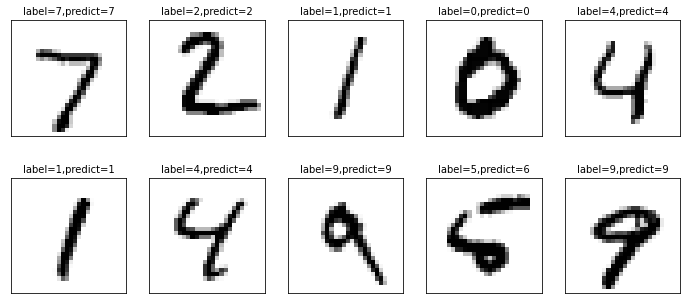

In [22]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix

In [35]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,0,0,1,4,1,2,0
1,0,1124,2,1,0,1,3,0,4,0
2,6,0,1000,6,1,0,2,9,8,0
3,1,0,0,1000,0,1,0,3,4,1
4,2,0,2,1,953,0,4,3,2,15
5,4,0,0,12,1,858,7,2,5,3
6,7,3,1,1,2,3,939,0,2,0
7,1,4,5,5,0,0,0,1007,2,4
8,5,0,1,5,4,2,2,4,948,3


In [22]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [23]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


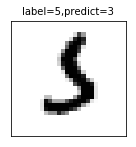

In [24]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

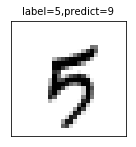

In [25]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)